# Julia Jupyter

## 参考
- [Fourier_spectral_PO](https://www.risk.tsukuba.ac.jp/~takitoshi/tutorial/Fourier_spectral_PO.html)
- [verifyPO](https://www.risk.tsukuba.ac.jp/~takitoshi/tutorial/verifyPO.html)

In [28]:
versioninfo()

Julia Version 1.10.4
Commit 48d4fd48430 (2024-06-04 10:41 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 16 × Intel(R) Core(TM) i7-10700F CPU @ 2.90GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, skylake)
Threads: 1 default, 0 interactive, 1 GC (on 16 virtual cores)
Environment:
  JULIA_NUM_THREADS = 


In [29]:
using DifferentialEquations

function vanderpol(du, u , μ ,t)
    x,y = u
    du[1] = y
    du[2] = μ*(1- x ^2)*y - x
end

vanderpol (generic function with 1 method)

In [30]:
# init x(0)=0, y(0)=2, mu=1

u₀ = [0.0; 2.0]
tspan = (0.0, 300)
μ = 1.0
prob = ODEProblem(vanderpol, u₀, tspan, μ)
sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 6121-element Vector{Float64}:
   0.0
   0.009232541136674264
   0.02503848692409142
   0.04358791409289996
   0.066445221117261
   0.09233090171528248
   0.1213988849663063
   0.15277986388185555
   0.18598700743093166
   0.22027027615414818
   ⋮
 299.60875136428757
 299.672845130983
 299.73339069040475
 299.7906646351122
 299.8447846649591
 299.89618912223216
 299.94617935932826
 299.993835164599
 300.0
u: 6121-element Vector{Vector{Float64}}:
 [0.0, 2.0]
 [0.01855031657580365, 2.0184626866340247]
 [0.050703595436878524, 2.050027988176535]
 [0.08907287465040681, 2.086909821404441]
 [0.13728952243153142, 2.1319144155808947]
 [0.19312565278980298, 2.1819383562142463]
 [0.2573461944267867, 2.236335516474371]
 [0.3284087346554558, 2.2920864005994797]
 [0.4054411340434457, 2.346530010799726]
 [0.48676248948641215, 2.396334097989657]
 ⋮
 [-0.39274561960690973, 1.7594459707138015]
 [-0.276016303665316, 1.8844657065

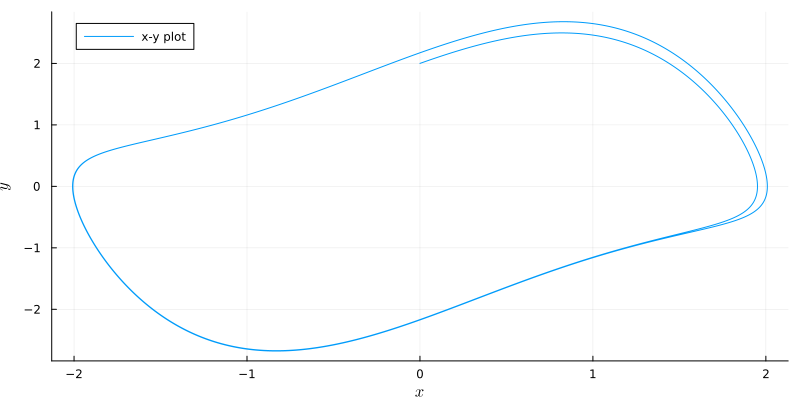

In [31]:
using Plots
plot(sol, vars=(1,2), size=(800,400), label="x-y plot", xlabel="\$x\$", ylabel="\$y\$")

In [32]:
u = hcat(sol.u...)

2×6121 Matrix{Float64}:
 0.0  0.0185503  0.0507036  0.0890729  …  0.318022  0.437247  0.452953
 2.0  2.01846    2.05003    2.08691       2.45866   2.54276   2.55261

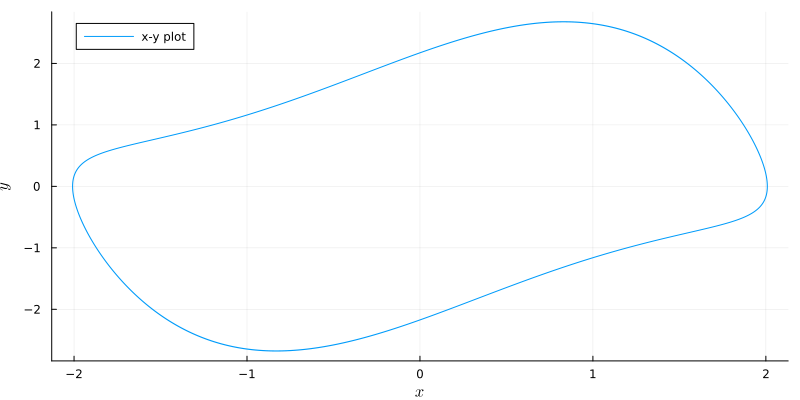

In [33]:
ind = floor(Int, length(sol.t)/2)
plot(u[1, ind:end], u[2, ind:end], size=(800,400), label="x-y plot", xlabel="\$x\$", ylabel="\$y\$")

In [34]:
#おおよその周期
a = 30
app_period = 6.55
timestep = 0.1

f_tmp = sol(a+app_period/2:timestep:a+3*app_period/2)
find_period = abs.(f_tmp .- sol(a))
(~,ind) = findmin(find_period[1,:])
b = a+app_period/2 + timestep*(ind-1)
# abs.(sol(b) .- sol(a))

36.675

In [35]:
#a function of  fourier coeffs
using FFTW
function odefouriercoeffs(f, N, I, n=1)
    a = I[1]; b = I[2];
    # x_j: equidistance node points
    h = (b-a)/(2N-1)
    j = 0:2N-2
    xⱼ = a .+ j*h
    # f_j: function values on node points
    fⱼ = f(xⱼ)[n,:]
    return (fftshift(fft(fⱼ)))/(2*N-1)
end

odefouriercoeffs (generic function with 2 methods)

In [36]:
# compute Fourier fouriercoeffs
N = 61 # size of Fourier
a₀ = odefouriercoeffs(sol,N,[a,b])

121-element Vector{ComplexF64}:
 0.00010857243174339745 + 1.447313750022881e-6im
 0.00010856849261564272 + 4.343718753921291e-6im
 0.00010856075337743351 + 7.246219054916758e-6im
 0.00010854882862950516 + 1.0158381435154395e-5im
 0.00010853325180073263 + 1.3084515275278865e-5im
 0.00010851317536608747 + 1.6028543859818915e-5im
 0.00010848929273218254 + 1.8994569469252842e-5im
 0.00010846070937853718 + 2.1987128096259438e-5im
  0.0001084277751097594 + 2.5010377581045937e-5im
  0.0001083900705802657 + 2.8069262170464258e-5im
                        ⋮
 0.00010842777510976395 - 2.5010377581047177e-5im
 0.00010846070937853711 - 2.1987128096259638e-5im
 0.00010848929273219384 - 1.8994569469243213e-5im
 0.00010851317536608747 - 1.6028543859818915e-5im
 0.00010853325180075092 - 1.3084515275199067e-5im
 0.00010854882862950525 - 1.0158381435154444e-5im
 0.00010856075337743417 - 7.2462190549069115e-6im
  0.0001085684926156428 - 4.3437187539213425e-6im
 0.00010857243174339748 - 1.4473137500224383e

In [37]:
function plot_solution(u, index) # u = [ω, a_{-N+1}, ..., a_0, ..., a_{N-1}], length(u) = 2N
  # index = 1: profile of solution
  #         2: Fourier mode
  #         3: phase profile
  ω = real(u[1])
  L = 2π / ω
  a = u[2:end]
  N = length(u)/2 # N: size of Fourier
  n_pad =1000
  a_pad = [zeros(n_pad);a;zeros(n_pad)]
  N_pad = N + n_pad    
  dx = L/(2*N_pad-1)
  x = dx*(0:2*N_pad-2)
  if index == 1
  # Plot profile:
      plot(x,real((2N_pad-1)*ifft(ifftshift(a_pad))),
          xlabel = "\$t\$",
          ylabel = "\$x\\,(t)\$",
          line   = 1.6,
          title  = "Profile of the solution",
          size   = (800,400),
          legend = false,
      )
  elseif index == 2
  # Plot Fourier coefficients:
      plot((-N+1):(N-1),abs.(a),yscale=:log10,
          xlabel = "\$k\$",
          ylabel = "\$|a_k\\,|\$",
          line   = 1.6,
          title  = "Fourier coefficients of the solution",
          size   = (800,400),
          legend = false,
      )
  elseif index == 3
  # Plot phase:
    k = (-N_pad+1):(N_pad-1)
    plot(real((2N_pad-1)*ifft(ifftshift(a_pad))),real((2N_pad-1)*ifft(ifftshift(a_pad.*(im*k*ω)))),
          xlabel = "\$x(t)\$",
          ylabel = "\$\\dot{x}\\,(t)\$",
          line   = 1.6,
          title  = "Phase plot of a numerical solution",
          size   = (800,400),
          legend = false,
      )
  end
end

function plot_solution!(u)
  L = 2π/real(u[1])
  a = u[2:end]
  N = length(u)/2
  n_pad = 1000
  a_pad = [zeros(n_pad);a;zeros(n_pad)]
  N_pad = N+n_pad
  k = (-N_pad+1):(N_pad-1)
  dx = L/(2*N_pad-1)
  x = dx*(0:2*N_pad-2)
  plot!(real((2N_pad-1)*ifft(ifftshift(a_pad))), real((2N_pad-1)*ifft(ifftshift(a_pad.*(im*k)))),
      line=1.6,
      label="Fourier interpolation"
  )
end

plot_solution! (generic function with 1 method)

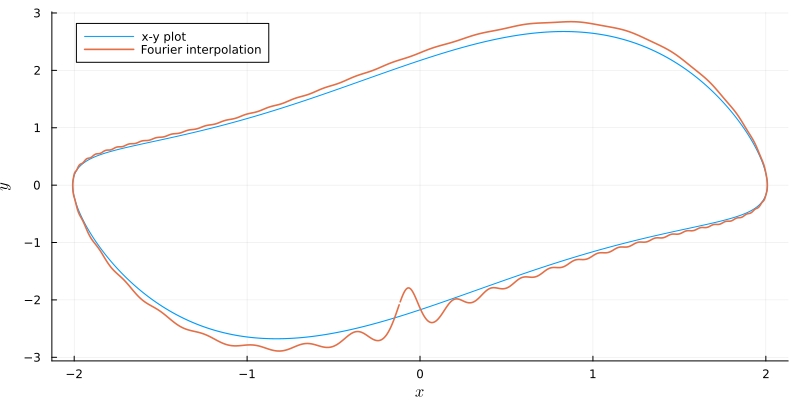

In [38]:
x0 = [2*pi/(b-a);a₀]
plot_solution!(x0)

In [39]:
function powerconvfourier(a::Vector{Complex{T}},p) where T
  M = Int((length(a)+1)/2)
  N = (p-1)*M
  ta = [zeros(N,1);a;zeros(N,1)] # 1. Padding zeros: size(ta) = 2pM-1
  tb = ifft(ifftshift(ta)) # 2. IFFT of ta
  tbᵖ = tb.^p # 3. tb*^tb
  cᵖ = fftshift(fft(tbᵖ))*(2.0*p*M-1)^(p-1)
  return cᵖ[N+1:end-N], cᵖ[p:end-(p-1)]# return (truncated, full) version
end

powerconvfourier (generic function with 1 method)

In [40]:
function F_fourier(x, μ, η₀)
  N = length(x)/2
  ω = x[1]
  a = x[2:end]
  (a³,~) = powerconvfourier(a,3)
  eta = sum(a) - η₀

  k = -(N-1):(N-1)
  f = (- k.^2 * ω^2 - μ* im * k * ω .+ 1) .* a + μ*im * k *ω .* a³ / 3

  return [eta;f]
end

F_fourier (generic function with 1 method)

In [41]:
function DF_fourier(x, μ)
  N = Int((length(x))/2)
  ω = x[1]
  a = x[2:end]
  k = (-N+1):(N-1)
  (a³,~) = powerconvfourier(a,3)

  DF = zeros(ComplexF64,2N,2N)

  DF[1,2:end] .= 1
  DF[2:end,1] = (- 2*ω*k.^2 - μ*im*k) .* a + μ*im*k .*a³/3

  (~,a2) = powerconvfourier(a,2)
  
  M = zeros(ComplexF64,2*N-1, 2*N-1)

  for j=(-N+1):(N-1)
      M[k.+N, j+N] = μ*im*k*ω.*a2[k.-j.+(2*N-1)]
  end
  
  L = diagm(- k.^2 * ω^2 - μ* im * k * ω .+ 1)
  
  DF[2:end,2:end] = L + M
  return DF
end

DF_fourier (generic function with 1 method)

Before step #1, ||F||_1 = 17.129706985286422
After step #1, ||F||_1 = 0.16249057553484444
After step #2, ||F||_1 = 0.0009482909730242728
After step #3, ||F||_1 = 1.9840298440240014e-8
After step #4, ||F||_1 = 1.8501435682210303e-13


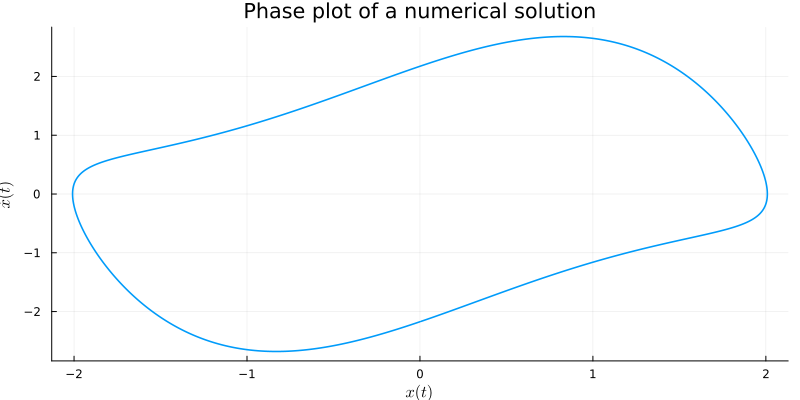

In [42]:
using LinearAlgebra
# Initial value of Newton method
# η₀ = real(sum(x0[2:end]))
η₀ = 0
x = x0

# Newton iteration
tol = 5e-10
F = F_fourier(x, μ, η₀)
println("Before step #1, ||F||_1 = $(norm(F,1))")
num_itr = 0

while num_itr ≤ 100
    x = x - DF_fourier(x, μ)\F
    num_itr += 1
    F = F_fourier(x, μ, η₀)
    println("After step #$(num_itr), ||F||_1 = $(norm(F,1))")
    if norm(F,1) < tol
        break
    end
end

L = 2π/real(x[1])
plot_solution(x, 3)
# plot!(u[1, ind:end], u[2, ind:end], legend=false)

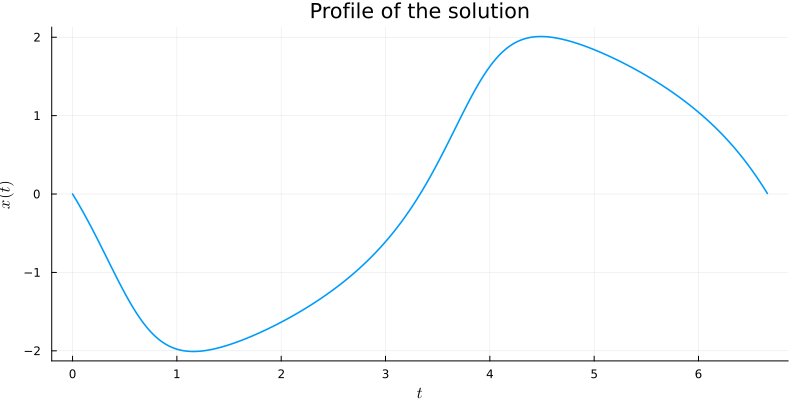

In [43]:
plot_solution(x, 1)

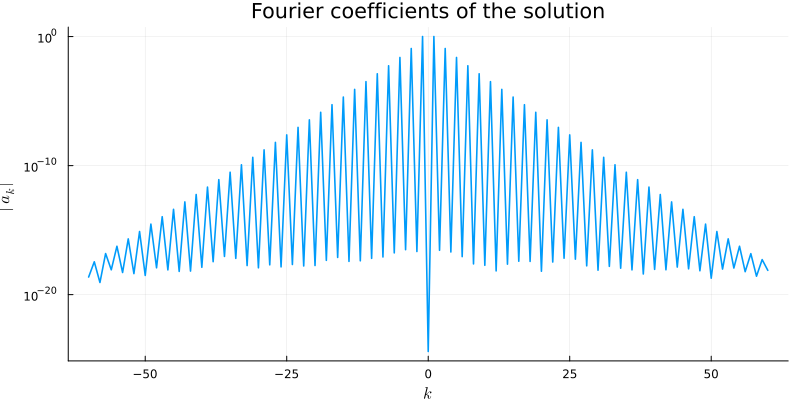

In [44]:
plot_solution(x, 2)